In [4]:
# data to import 'Plate ID', 'Registration State', 'Vehicle Make', 'Vehicle Color', 'Voilation Time', 'Street Name','Violation Description','Violation Code'

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
nyc_parking_v = pd.read_excel('c:\\Users\\Josephine\\Downloads\\nyc-violation-ticket (2).xlsx',  usecols = ["Plate ID","Issue Date", "Registration State", "Vehicle Make", "Vehicle Color","Violation Description" ,"Violation Time","Violation Code", "Street Name"])

nyc_parking_v


,Plate ID,Registration State,Issue Date,Violation Code,Vehicle Make,Violation Time,Street Name,Vehicle Color,Violation Description
0,KGK6659,NY,2020-11-12,36,BMW,0637P,WB ATLANTIC AVE @ SH,GY,PHTO SCHOOL ZN SPEED VIOLATION
1,L5232HY,TN,2020-09-14,21,INTER,0853A,Rockaway Beach Blvd,WHITE,NaN
2,BPMN76,FL,2020-11-25,20,NISSA,0853A,W 113th St,BLACK,20A-No Parking (Non-COM)
3,57387MJ,NY,2020-08-20,38,NaN,0444P,W 33rd St,WH,NaN
4,M81KFJ,NJ,2020-09-09,36,TOYOT,0723A,WB FOSTER AVE @ E 18,NaN,PHTO SCHOOL ZN SPEED VIOLATION
...,...,...,...,...,...,...,...,...,...
49995,JPN4910,NY,2020-06-25,5,FORD,0342P,EB E 125TH ST @ 2ND,RD,BUS LANE VIOLATION
49996,174ZYG,CT,2020-08-25,31,TOYOT,0828A,W 13th St,BLACK,NaN
49997,HES6895,NY,2020-11-03,46,CADIL,0933P,E 182nd St,RD,NaN
49998,63035MN,NY,2020-08-19,40,ISUZU,1215P,W Kingsbridge Rd,WH,NaN


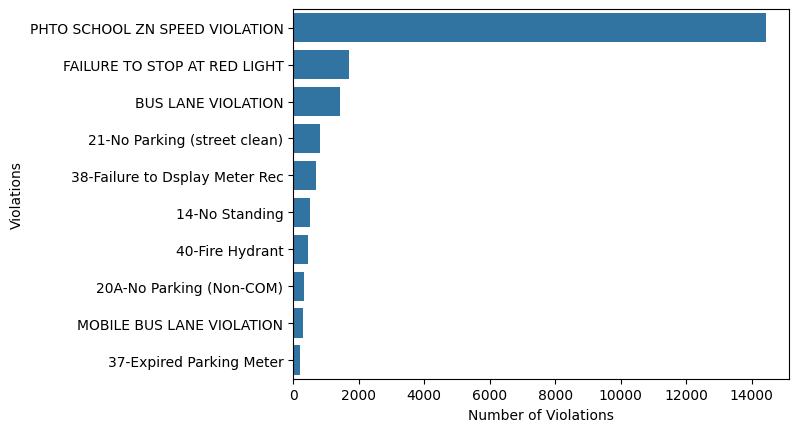

In [6]:
# What are the most commom type of violations 
common_violations= nyc_parking_v['Violation Description'].value_counts().head(10)
#common_violations
# Creatimg a barplot 
sns.barplot(x=common_violations.values, y=common_violations.index )

plt.xlabel ('Number of Violations')
plt.ylabel('Violations')
plt.show()

In [6]:
nyc_parking_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Plate ID               50000 non-null  object        
 1   Registration State     50000 non-null  object        
 2   Issue Date             50000 non-null  datetime64[ns]
 3   Violation Code         50000 non-null  int64         
 4   Vehicle Make           49864 non-null  object        
 5   Violation Time         49999 non-null  object        
 6   Street Name            49990 non-null  object        
 7   Vehicle Color          47583 non-null  object        
 8   Violation Description  22802 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 3.4+ MB


In [7]:
# Missing values in the dataset
nyc_parking_v.isnull().sum()

Plate ID                     0
Registration State           0
Issue Date                   0
Violation Code               0
Vehicle Make               136
Violation Time               1
Street Name                 10
Vehicle Color             2417
Violation Description    27198
dtype: int64

In [37]:
# Q3. How do we handle The mising values
# Lets work on the missing values
# The violation code for every Violation Description is distinct, We use this code to fill in the missimg values for Violation description
# ignoring the missing values for Violation decription would grossly affect our results hence analysis, since its more than half the data.


# Filling the empty rows of "Violation Describtion" using "Violation Code" as a referrence
 
    # Finding all the unique violations and their respective violation codes
viol_code = nyc_parking_v.groupby('Violation Description')['Violation Code'].unique()
 
    # Retrieving list of unique Violation descriptions as a tuple
violation_descriptions = tuple(viol_code.index)
 
    # Retrieving list of unique violation codes as a tuple
violation_codes = tuple(viol_code.to_list())
 
    
 
 

In [38]:
# We fill all missing values in the Violation Description column with their corresponding Violation Code

def fill_missing_values(row):
    if pd.isnull(row['Violation Description']):  # Check if 'Violation Description' is missing
        return row['Violation Code']  # Fill missing value with corresponding 'Violation Code'
    else:
        return row['Violation Description']  # Otherwise, keep the existing value
 
# Filling in the missing values of the "Violation Describtion" with "Violation Code"
nyc_parking_v['Violation Description'] = nyc_parking_v.apply(fill_missing_values, axis=1)
 
    # Checking the new data of 'Violation Description'
nyc_parking_v['Violation Description'].head(8)

0    PHTO SCHOOL ZN SPEED VIOLATION
1      21-No Parking (street clean)
2          20A-No Parking (Non-COM)
3    38-Failure to Dsplay Meter Rec
4    PHTO SCHOOL ZN SPEED VIOLATION
5    PHTO SCHOOL ZN SPEED VIOLATION
6          20A-No Parking (Non-COM)
7    PHTO SCHOOL ZN SPEED VIOLATION
Name: Violation Description, dtype: object

In [39]:

# Finally replacing the codes in the "Violation Description" with the appropriate Descriptions
nyc_parking_v['Violation Description'] = nyc_parking_v['Violation Description'].replace(violation_codes, violation_descriptions)
 
    # Checking the new data of 'Violation Description'
nyc_parking_v['Violation Description']

0        PHTO SCHOOL ZN SPEED VIOLATION
1          21-No Parking (street clean)
2              20A-No Parking (Non-COM)
3        38-Failure to Dsplay Meter Rec
4        PHTO SCHOOL ZN SPEED VIOLATION
                      ...              
49995                BUS LANE VIOLATION
49996      31-No Stand (Com. Mtr. Zone)
49997    46B-Double Parking (Com-100Ft)
49998                   40-Fire Hydrant
49999          20A-No Parking (Non-COM)
Name: Violation Description, Length: 50000, dtype: object

In [14]:
nyc_parking_v.isnull().sum()

Plate ID                    0
Registration State          0
Issue Date                  0
Violation Code              0
Vehicle Make              136
Violation Time              1
Street Name                10
Vehicle Color            2417
Violation Description       0
dtype: int64

In [ ]:
# Q4.What is the average fine amount for each violataion type

# Average fine amount for each violation type
Fine_amt =['100']


avg_fine_viol_type= nyc_parking_v.groupby('Violation Description')[ Fine_amt].mean()

avg_fine_viol_type

 

In [16]:
# Directly select the specific columns you want to keep
nyc_parking_v_df =nyc_parking_v[["Violation Description", "Issue Date"]]
# Display filtered Data Frame
nyc_parking_v_df.head(15)

,Violation Description,Issue Date
0,PHTO SCHOOL ZN SPEED VIOLATION,2020-11-12
1,21-No Parking (street clean),2020-09-14
2,20A-No Parking (Non-COM),2020-11-25
3,38-Failure to Dsplay Meter Rec,2020-08-20
4,PHTO SCHOOL ZN SPEED VIOLATION,2020-09-09
5,PHTO SCHOOL ZN SPEED VIOLATION,2020-09-21
6,20A-No Parking (Non-COM),2020-07-14
7,PHTO SCHOOL ZN SPEED VIOLATION,2020-08-10
8,74-Missing Display Plate,2020-11-12
9,38-Failure to Dsplay Meter Rec,2020-10-26


In [41]:

nyc_parking_v["Issue Date"] = pd.to_datetime(nyc_parking_v["Issue Date"])

# Determine the number of violations for each month
yearly_violations = nyc_parking_v.resample("ME", on = "Issue Date").size()
print('Number of variations for each month is: ')
yearly_violations.head(15)




Number of variations for each month is: 


Issue Date
2010-10-31    1
2010-11-30    0
2010-12-31    0
2011-01-31    0
2011-02-28    0
2011-03-31    0
2011-04-30    0
2011-05-31    0
2011-06-30    0
2011-07-31    0
2011-08-31    0
2011-09-30    0
2011-10-31    0
2011-11-30    0
2011-12-31    0
Freq: ME, dtype: int64

In [48]:

# Calculating the monthly trends
 
# Group the filtered DataFrame by month and find the maximum value within each month
monthly_violations = yearly_violations.groupby([yearly_violations.index.month]).max()  # This returns the months of the year with the max violations

monthly_violations

Issue Date
1         0
2         2
3         0
4         0
5       101
6      1839
7      7900
8     10658
9     11021
10    10797
11     7676
12        1
dtype: int64

********** A GRAPH SHOWING THE CHANGE IN FREQUENCY OF␣PARKING VIOLATIONS OVER TIME **********


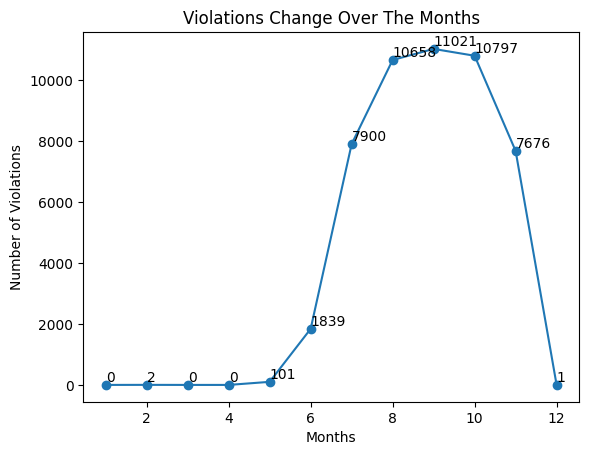

In [44]:

# Obtaining only the months
months = monthly_violations.index
 
# Obtaining the sum of violations of those months
no_of_violations = monthly_violations.to_list()
 
# Plotting a graph to represent the data
plt.plot(months, no_of_violations, marker='o', label='Violations')
 
for i, (x, y) in enumerate(zip(months, no_of_violations)):
    plt.text(x, y, f'{y}', ha='left', va='bottom')  # Adding y-values as annotations
 
plt.xlabel('Months')

plt.ylabel('Number of Violations')

plt.title('Violations Change Over The Months')
print("********** A GRAPH SHOWING THE CHANGE IN FREQUENCY OF␣PARKING VIOLATIONS OVER TIME **********")

plt.show()